In [5]:
sample_text = """I loved this movie since I was 7 and I saw it on the opening day. It was so touching and beautiful. I strongly recommend seeing for all. It's a movie to watch with your family by far.<br /><br />My MPAA rating: PG-13 for thematic elements, prolonged scenes of disastor, nudity/sexuality and some language.
First things first, Edison Chen did a fantastic, believable job as a Cambodian hit-man, born and bred in the dumps and a gladiatorial ring, where he honed his craft of savage battery in order to survive, living on the mantra of kill or be killed. In a role that had little dialogue, or at least a few lines in Cambodian/Thai, his performance is compelling, probably what should have been in the Jet Li vehicle Danny the Dog, where a man is bred for the sole purpose of fighting, and on someone else's leash.<br /><br />Like Danny the Dog, the much talked about bare knuckle fight sequences are not choreographed stylistically, but rather designed as normal, brutal fisticuffs, where everything goes. This probably brought a sense of realism and grit when you see the characters slug it out at each other's throats, in defending their own lives while taking it away from others. It's a grim, gritty and dark movie both literally and figuratively, and this sets it apart from the usual run off the mill cop thriller production.<br /><br />Edison plays a hired gun from Cambodia, who becomes a fugitive in Hong Kong, on the run from the cops as his pickup had gone awry. Leading the chase is the team led by Cheung Siu-Fai, who has to contend with maverick member Inspector Ti (Sam Lee), who's inclusion and acceptance in the team had to do with the sins of his father. So begins a cat and mouse game in the dark shades and shadows of the seedier looking side of Hong Kong.<br /><br />The story itself works on multiple levels, especially in the character studies of the hit-man, and the cop. On opposite sides of the law, we see within each character not the black and white, but the shades of grey. With the hit-man, we see his caring side when he got hooked up and developed feelings of love for a girl (Pei Pei), bringing about a sense of maturity, tenderness, and revealing a heart of gold. The cop, with questionable tactics and attitudes, makes you wonder how one would buckle when willing to do anything it takes to get the job done. There are many interesting moments of moral questioning, on how anti-hero, despicable strategies are adopted. You'll ask, what makes a man, and what makes a beast, and if we have the tendency to switch sides depending on circumstances - do we have that dark inner streak in all of us, transforming from man to dog, and dog to man? Dog Bite Dog grips you from the start and never lets go until the end, though there are points mid way through that seemed to drag, especially on its tender moments, and it suffered too from not knowing when to end. If I should pick a favourite scene, then it must be the one in the market food centre - extremely well controlled and delivered, a suspenseful edge of your seat moment. Listen out for the musical score too, and you're not dreaming if you hear growls of dogs.<br /><br />Highly recommended, especially if you think that you've seen about almost everything from the cop thriller genre.
Once again, I was browsing through the discount video bin and picked up this movie for $4.88. Fifty-percent of the time the movies I find in the bin are pure crap (I mean horrible beyond belief) but half the time they turn out to be surprisingly good. This movie is much better than I expected. I found it very engaging, though it was obviously made by an amateur.<br /><br /> The direction is nothing special, but the story is intriguing with some good thrills. I expected it to be more of a comedy, but I wasn't too disappointed.<br /><br /> For a thriller, this movie is surprisingly good-natured. There's no bloody violence, no profanity, no nudity, no sex. Usually, these movies require all four of those elements. The PG rating is well-deserved--not like "Sixteen Candles" where the "f" word is used twice and there's a brief gratuitous nude scene.<br /><br /> I just wish the romance between Corey Haim and his love interest could've been developed more. The film does tend to be plot-heavy, and the potentially good subplots are pushed off to the side. Instead of developing a chemistry between the two of them, we end up watching a careless three-minute montage of them on their romantic endeavors. They end up kissing at the end, but there's so little chemistry that it seems forced.<br /><br />"The Dream Machine" is no gem, but it's good, clean entertainment. It's quite forgettable--especially with a cast of unknowns, except for Haim--but it's also much better than you'd expect.<br /><br /> My score: 7 (out of 10)
"""

### NLTK

In [46]:
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# initialize obj
tokenizer = RegexpTokenizer(r'\w+')
eng_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [8]:
eng_stopwords.add('not')


In [9]:
def  getreview(review):
    review = review.lower()
    review = review.replace('<br /><br />',' ')
    # tokenize
    tokens = tokenizer.tokenize(review)
    new_tokens = (token for token in tokens if token not in eng_stopwords)
    stemmed_token = (ps.stem(token) for token in new_tokens)
    return ' '.join(stemmed_token)

In [10]:
getreview('mily by far.<br /><br />My MPAA rating: PG-13 for thematic elements')

'mili far mpaa rate pg 13 themat element'

In [11]:
getreview(sample_text)

'love movi sinc 7 saw open day touch beauti strongli recommend see movi watch famili far mpaa rate pg 13 themat element prolong scene disastor nuditi sexual languag first thing first edison chen fantast believ job cambodian hit man born bred dump gladiatori ring hone craft savag batteri order surviv live mantra kill kill role littl dialogu least line cambodian thai perform compel probabl jet li vehicl danni dog man bred sole purpos fight someon els leash like danni dog much talk bare knuckl fight sequenc choreograph stylist rather design normal brutal fisticuff everyth goe probabl brought sens realism grit see charact slug throat defend live take away other grim gritti dark movi liter figur set apart usual run mill cop thriller product edison play hire gun cambodia becom fugit hong kong run cop pickup gone awri lead chase team led cheung siu fai contend maverick member inspector ti sam lee inclus accept team sin father begin cat mous game dark shade shadow seedier look side hong kong s

In [12]:
# write a function that accepts a input file and return aclean output 
def getstemmedfile(inputs,output):
    output_file = open(output,'w',encoding='utf8')
    with open (inputs,encoding='utf8') as f:
        reviews = f.readlines()
    
    for review in reviews:
        clean_data = getreview(review)
        print((clean_data),file = output_file)
     
    output_file.close()

In [13]:
import sys

In [14]:
inputs = sys.argv[0]
output = sys.argv[1]

In [15]:
getstemmedfile(inputs,output)

In [16]:
getstemmedfile('movie_review.txt','movie_review_cleaned.txt')

this created a clean text file name as movie_review_cleaned.txt

### Multinomial event  model

In [17]:
x = ["This was an awesome movie",
     "Great movie! I liked it a lot",
     "Happy Ending! awesome acting by the hero",
     "loved it! truly great",
     "bad not upto the mark",
     "could have better",
     "Surely a Disappointing movie"]

y = [1,1,1,1,0,0,0]

#### cleaning

In [18]:
x_clean = [getreview(i) for i in x]

In [19]:
print(x_clean)

['awesom movi', 'great movi like lot', 'happi end awesom act hero', 'love truli great', 'bad upto mark', 'could better', 'sure disappoint movi']


In [20]:
test_x = ["I was happy happy and I loved the acting in the movie",
          "The movie I saw was good"]
test_clean = [getreview(i) for i in test_x]
print(test_clean)

['happi happi love act movi', 'movi saw good']


#### Vectorization

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(ngram_range=(1,2))

In [23]:
x_clean_vector = cv.fit_transform(x_clean).toarray()
print(x_clean_vector.shape)

(7, 33)


In [24]:
cv.get_feature_names()

['act',
 'act hero',
 'awesom',
 'awesom act',
 'awesom movi',
 'bad',
 'bad upto',
 'better',
 'could',
 'could better',
 'disappoint',
 'disappoint movi',
 'end',
 'end awesom',
 'great',
 'great movi',
 'happi',
 'happi end',
 'hero',
 'like',
 'like lot',
 'lot',
 'love',
 'love truli',
 'mark',
 'movi',
 'movi like',
 'sure',
 'sure disappoint',
 'truli',
 'truli great',
 'upto',
 'upto mark']

In [25]:
print(x_clean_vector)

[[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0]]


In [26]:
testx_clean_vector = cv.transform(test_clean).toarray()
print(testx_clean_vector.shape)

(2, 33)


In [27]:
print(testx_clean_vector)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [28]:
print(testx_clean_vector.shape)

(2, 33)


In [29]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [30]:
mnb = MultinomialNB()
print (mnb)
#training
mnb.fit(x_clean_vector,y)

MultinomialNB()


MultinomialNB()

In [31]:
#predict
mnb.predict(testx_clean_vector)

array([1, 1])

In [32]:
mnb.predict_proba(testx_clean_vector)

array([[0.0836554 , 0.9163446 ],
       [0.38255034, 0.61744966]])

In [33]:
#accuracy
mnb.score(x_clean_vector,y)

1.0

### multivariate bernoulli event model

In [34]:
bnb = BernoulliNB(binarize=0.0)#binarize= 0.0 means 0 is a threshold anything above 0 will be considered as 1 

In [35]:
print(bnb)

BernoulliNB()


In [36]:
bnb.fit(x_clean_vector,y)

BernoulliNB()

In [37]:
bnb.predict(testx_clean_vector)

array([1, 1])

In [38]:
bnb.predict_proba(testx_clean_vector)

array([[0.09025538, 0.90974462],
       [0.44248591, 0.55751409]])

In [39]:
#accuracy
bnb.score(x_clean_vector,y)

1.0

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
y_pred = bnb.predict(x_clean_vector)

In [42]:
cnf_matrix = confusion_matrix(y,y_pred)

In [43]:
print(cnf_matrix)

[[3 0]
 [0 4]]


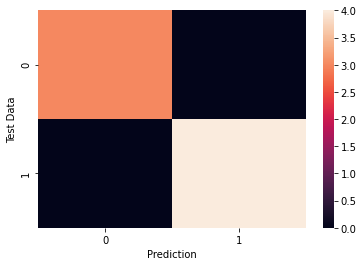

In [47]:
sns.heatmap(cnf_matrix)
plt.xlabel('Prediction')
plt.ylabel('Test Data')
plt.show()